In [1]:
import requests
import pandas as pd
from lxml import html
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


url = "https://news.google.com/search?q=CAVA"

response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Parse HTML with lxml
tree = html.fromstring(response.text)

# Select all <a> elements
headlines = tree.xpath('//a/text()')

# Clean and filter
extracted_headlines = [text.strip() for text in headlines if text.strip()]

# Optional: remove first few if irrelevant
extracted_headlines = extracted_headlines[17:]

for headline in extracted_headlines:
    print(headline)
    
nlp = spacy.load("en_core_web_sm")

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

filtered_list = []

for sentence in extracted_headlines:
    sentence = ' '.join([token.lemma_ for token in nlp(sentence) if token.text.lower() not in stop_words])
    if sentence != '':
        print(sentence)
        filtered_list.append(sentence)

print(filtered_list)

vectorizer = TfidfVectorizer()


tfidf_matrix = vectorizer.fit_transform(filtered_list)


feature_names = vectorizer.get_feature_names_out()
dense_tfidf_matrix = tfidf_matrix.todense()


for i, headline in enumerate(filtered_list):
    print(f"Headline: {headline}")
    print("TF-IDF Scores:")
    
    for word, tfidf in zip(feature_names, dense_tfidf_matrix[i].tolist()[0]):
        if tfidf > 0:  # Display words with non-zero TF-IDF scores
            print(f"  {word}: {tfidf:.4f}")
    print("\n")


vectorizer = TfidfVectorizer()


tfidf_matrix = vectorizer.fit_transform(filtered_list)


feature_names = vectorizer.get_feature_names_out()
dense_tfidf_matrix = tfidf_matrix.todense()


top_words_per_headline = []

for i, headline in enumerate(filtered_list):
    
    word_tfidf_pairs = [
        (word, tfidf) for word, tfidf in zip(feature_names, dense_tfidf_matrix[i].tolist()[0]) if tfidf > 0
    ]
    
    top_words = sorted(word_tfidf_pairs, key=lambda x: x[1], reverse=True)[:3]
    
    
    top_words_per_headline.append(" ".join([word for word, tfidf in top_words]))


for i, headline in enumerate(top_words_per_headline):
    print(f"Filtered Headline {i+1}: {headline}")

print(top_words_per_headline)


nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

data = {
    "headline": top_words_per_headline
}

df = pd.DataFrame(data)

df['sentiment_score'] = df['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')


print(df.head(10))

Cava Stock Drops After Earnings. Growth Was Strong Despite Tariff Fears.
Frost defeat Sceptres to take 2-1 series lead as McGuigge, Cava lead way
McQuigge, Cava each score twice, Frost beat Sceptres 7-5 to take 2-1 series lead
Cava Slides on Q1 Results
Wall Street Analysts Think Cava (CAVA) Could Surge 33.57%: Read This Before Placing a Bet
Cava revenue beats estimates as Mediterranean chain reports double-digit same-store sales growth
McQuigge, Cava each score twice, Frost beat Sceptres 7-5 to take 2-1 series lead
Why Cava Group Stock Was Withering This Week
Q1 Earnings Outperformers: CAVA (NYSE:CAVA) And The Rest Of The Modern Fast Food Stocks
CAVA Group, Inc. (CAVA) Is a Trending Stock: Facts to Know Before Betting on It
CAVA's Traffic-Driven Growth, Price Discipline Is Better Than Broader Market: Analyst
Why CAVA Group, Inc. (CAVA) Went Down Today
BofA Reiterates a Buy Rating on Cava Group (CAVA), Lifts PT
Police investigating CAVA Chicago burglary in 1400-block of North Milwaukee 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/niyati/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/niyati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/niyati/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Cava Stock Drops earning . growth strong despite tariff fear .
Frost defeat sceptre take 2 - 1 series lead McGuigge , Cava lead way
McQuigge , Cava score twice , Frost beat Sceptres 7 - 5 take 2 - 1 series lead
Cava Slides Q1 result
Wall Street analyst think Cava ( CAVA ) could surge 33.57 % : read place Bet
Cava revenue beat estimate Mediterranean chain report double - digit - store sale growth
McQuigge , Cava score twice , Frost beat Sceptres 7 - 5 take 2 - 1 series lead
Cava Group Stock wither week
Q1 Earnings Outperformers : CAVA ( NYSE : CAVA ) rest Modern Fast Food stock
CAVA Group , Inc. ( CAVA ) trend Stock : fact know bet
CAVA 's traffic - drive Growth , Price Discipline well broad Market : Analyst
CAVA Group , Inc. ( CAVA ) go today
BofA reiterate Buy Rating Cava Group ( CAVA ) , Lifts PT
Police investigate CAVA Chicago burglary 1400 - block North Milwaukee Avenue Wicker Park
CAVA hit $ 1 billion Revenue Milestone Q1 Sales Soar 28 % Robust Store growth
Jim Cramer Views CAVA G

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/niyati/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5664.0815 - val_loss: 16281.8457
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5711.9058 - val_loss: 16116.0293
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5646.6108 - val_loss: 15901.4434
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5673.1045 - val_loss: 15626.4883
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5596.0918 - val_loss: 15259.2012
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5205.6089 - val_loss: 14773.8887
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5224.3442 - val_loss: 14127.3750
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4868.7036 - val_loss: 13288.6787
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4648.0078 - val_loss: 12241.4385
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4498.9673 - val_loss: 10962.9619
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3916.6990 - val_loss: 9478.6348
Epoch 12/50
6/6 ━━━━━━━━━━━━━━

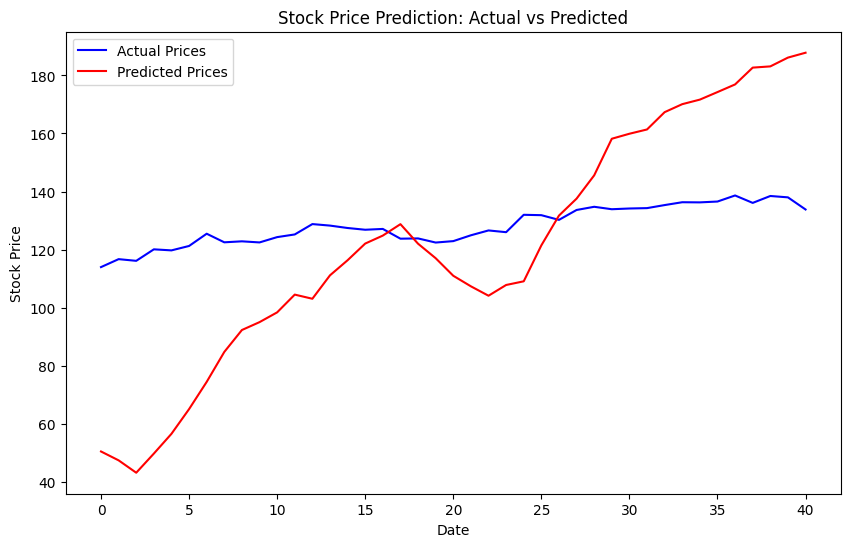

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt


ticker = "CAVA" 
data = yf.download(ticker, start="2024-01-01", end="2024-10-31")


def create_dataset(data, n_days=5):
    if 'Close' not in data.columns:
        raise ValueError("Missing required 'Close' column")

    X, y = [], []
    for i in range(n_days, len(data)):
        # Using the last 'n_days' 
        X.append(data.iloc[i - n_days:i]['Close'].values)  
        # 'Close' price
        y.append(data['Close'].iloc[i])  
    
    return np.array(X), np.array(y)


n_days = 5  
X, y = create_dataset(data, n_days=n_days)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = np.array([scaler.fit_transform(x.reshape(-1, 1)) for x in X_train])
X_test_scaled = np.array([scaler.transform(x.reshape(-1, 1)) for x in X_test])

model = Sequential()

model.add(Flatten(input_shape=(X_train_scaled.shape[1], 1)))


model.add(Dense(128, activation='relu'))  
model.add(Dense(64, activation='relu'))   

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (Mean Squared Error): {loss}")

y_pred = model.predict(X_test_scaled)


plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5715.7983 - val_loss: 16192.9707
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5487.2935 - val_loss: 16005.9492
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5269.7212 - val_loss: 15769.1221
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5348.3262 - val_loss: 15489.0879
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5223.5352 - val_loss: 15195.7168
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5189.8398 - val_loss: 14885.9854
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5137.5586 - val_loss: 14541.8486
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5013.5107 - val_loss: 14153.1514
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4782.7388 - val_loss: 13745.6455
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4648.2461 - val_loss: 13308.0400
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4471.9463 - val_loss: 12842.9668
Epoch 12/50
6/6 ━━━━━━━━━━━━━

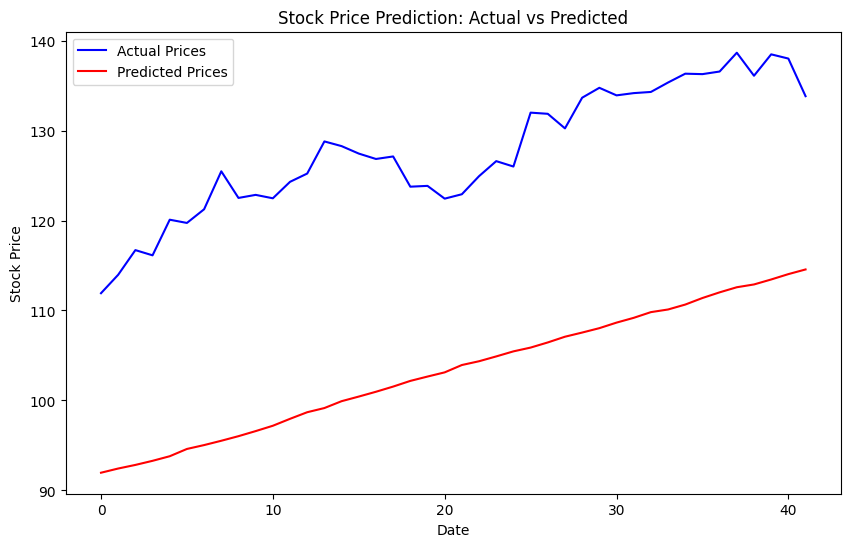

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


ticker = "CAVA"  
data = yf.download(ticker, start="2024-01-01", end="2024-10-31")

def create_dataset(data):
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"Missing required columns: {', '.join(required_columns)}")
    
    X, y = [], []

    for i in range(1, len(data)):
        feature_data = data.iloc[:i][['Open', 'High', 'Low', 'Close', 'Volume']].values
        
        if len(feature_data) < len(data) - 1:
            pad_length = len(data) - 1 - len(feature_data)
            feature_data = np.pad(feature_data, ((pad_length, 0), (0, 0)), mode='constant', constant_values=0)
        
        X.append(feature_data)
        
        y.append(data['Close'].iloc[i])  
    
    return np.array(X), np.array(y)


X, y = create_dataset(data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = np.array([scaler.fit_transform(x) for x in X_train])
X_test_scaled = np.array([scaler.transform(x) for x in X_test])


model = Sequential()

model.add(Flatten(input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.2))  

model.add(Dense(64, activation='relu'))   
model.add(Dropout(0.2)) 

model.add(Dense(1))

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

loss = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss (Mean Squared Error): {loss}")

y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
